# 🧪 BioOpti: Optimization Toolkit for Industrial Biochemistry

## 👋 Introduction

**BioOpti** is a Python-based toolkit designed to assist in the **optimization of culture media** and the **simulation of enzymatic reactions** in industrial or research contexts. This project was developed as part of a scientific programming course and integrates concepts from biochemistry, modeling, and software engineering to create a functional and flexible tool.

### 🎯 Project Goals
### ⚠️⚠️⚠️To adapt at the end of the project

Our main goals are to:
- Optimize culture media composition based on specific organism requirements.
- Simulate enzymatic reaction rates considering parameters like substrate concentration, temperature, pH, and competitive inhibition.

### 👩‍🔬 Team Members 
### ⚠️⚠️⚠️TO MODIFIY !!!

| Name   | Role                                                                 |
|--------|----------------------------------------------------------------------|
| Clara  | Repository setup, package infrastructure, unit testing, reaction simulation |
| [Name 2] | Culture media optimization module                                  |
| [Name 3] | Enzyme modeling & data integration                                 |
| [Name 4] | Visualizations, notebook design, and documentation                 |

### 📚 Notebook Structure

1. Introduction  
2. Project Functionality Overview  
3. Demonstrations  
4. Visualizations & Interactive Tools  
5. Challenges & Limitations  
6. Conclusion & Future Work


## 🛠️ Project Functionality Overview

BioOpti is organized as a modular Python package located in the `src/bioopti/` folder. Each module handles a specific task, making the package easy to maintain, extend, and test.

### 🧫 `media_optimizer.py`
This module contains functions for optimizing the ratio of nutrients in a culture medium to maximize growth or productivity for a given organism. It supports:
### ⚠️⚠️⚠️TO COMPLETE BY PIETRO AND MARC 


### ⚙️ `enzyme_kinetics.py`
This module defines the mathematical models used to simulate enzymatic reaction rates. It includes:
- A **modified Michaelis-Menten equation** that accounts for:
  - Substrate concentration (Km, Vmax)
  - pH and temperature deviations using **Gaussian-like penalty functions**
  - **Competitive inhibition**, which adjusts the apparent Km value

### 📈 `simulation.py`
This module provides functions to **run simulations using the kinetic model** from `enzyme_kinetics.py`. It includes:
- A user-facing `simulate_reaction_rate()` function that takes inputs like:
  - Substrate concentration
  - pH
  - Temperature
  - Inhibitor concentration
- Optionally retrieves enzyme-specific parameters from a local JSON dataset (e.g., `data/enzyme_data.json`)
- Returns the calculated reaction rate, which can be used for plotting or optimization.

### ⚠️⚠️⚠️OPTIMIZATION TOOL BY WILLY 




## 🔬 Demonstrations

### ⚠️⚠️⚠️ COMPLTE WITH DEMO FOR CULUTRE MDEIA OPTIMIZATION
### ⚠️⚠️⚠️ Complete wih optimization tool after my part 


## 🧪 simulation of enzymatic reaction
Let’s now walk through the practical functionality of BioOpti. In this section, we’ll simulate enzymatic reaction rates under different conditions using both synthetic inputs and real enzyme data.

Each subsection highlights a different use-case for the simulation engine:
- 1: Basic simulation using hardcoded parameters
- 2: Exploring the effect of pH
- 3: One-line simulation using full parameter extraction
- 4: Visualizing competitive inhibition with real data

### ✅ 1 Basic Reaction Rate Simulation

Let’s begin with a simple case using the core `simulate_reaction_rate()` function with all parameters manually specified.


In [11]:
from bioopti.simulation import simulate_reaction_rate

rate = simulate_reaction_rate(
    substrate_conc=0.5,
    vmax=1.5,
    km=0.1,
    ph=7.0,
    temp=37.0,
    optimal_ph=7.0,
    optimal_temp=37.0,
    ph_sigma=1.0,
    temp_sigma=5.0,
    inhibitor_conc=0.0,
    ki=0.2
)

print(f"⚡ Basic simulated rate: {rate:.4f} µmol/min")


⚡ Basic simulated rate: 1.2500 µmol/min


### 🌡️ 2 Effect of pH on Enzyme Activity

In this simulation, we’ll vary the **pH** of the medium while keeping everything else constant to observe how it affects enzyme performance. Since BioOpti models pH tolerance with a Gaussian penalty centered on the enzyme’s optimal pH, you’ll see that activity drops as we move away from this optimum.


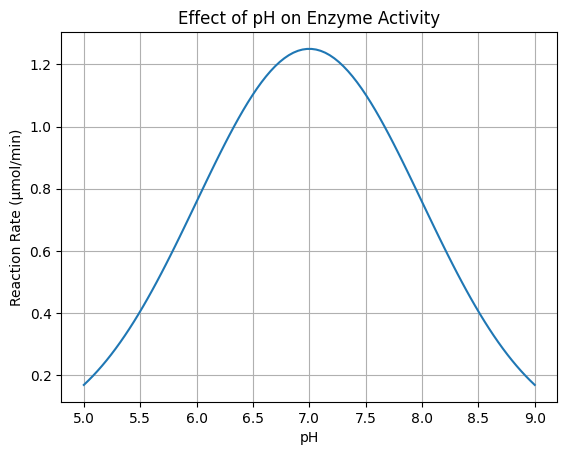

In [12]:
import numpy as np
import matplotlib.pyplot as plt

pH_values = np.linspace(5.0, 9.0, 100)
rates = [simulate_reaction_rate(
    substrate_conc=0.5,
    vmax=1.5,
    km=0.1,
    ph=pH,
    temp=37.0,
    optimal_ph=7.0,
    optimal_temp=37.0,
    ph_sigma=1.0,
    temp_sigma=5.0,
    inhibitor_conc=0.0,
    ki=0.2
) for pH in pH_values]

plt.plot(pH_values, rates)
plt.xlabel("pH")
plt.ylabel("Reaction Rate (µmol/min)")
plt.title("Effect of pH on Enzyme Activity")
plt.grid(True)
plt.show()


### 📂 3 Simulation from Local Dataset

Now, let’s use BioOpti’s function: `simulate_from_local_data()`.

This function:
- Automatically retrieves all known enzyme parameters from `enzyme_data.json`
- Runs the simulation with just a few custom inputs (like pH, temp, and [S])
- Returns both the simulated rate and the full parameter set used

In [13]:
from bioopti.simulation import simulate_from_local_data

# Define the enzyme to use
enzyme = "lactate dehydrogenase"
organism = "Homo sapiens"

# Pull parameters and simulate
rate, params = simulate_from_local_data(
    enzyme_name=enzyme,
    organism=organism,
    substrate_conc=0.5,
    ph=7.2,
    temp=36.0,
    inhibitor_conc=0.1,
    ki=0.2
)

print(f"⚡ Simulated rate for {enzyme} ({organism}): {rate:.4f} µmol/min")
print("📊 Parameters used:")
for key, value in params.items():
    print(f"  {key}: {value}")


📁 Loading enzyme data from: /Users/clarabergonzi/Desktop/BioOpti/data/enzyme_data.json
⚡ Simulated rate for lactate dehydrogenase (Homo sapiens): 79.5136 µmol/min
📊 Parameters used:
  km: 0.15
  vmax: 120.0
  optimal_pH: 7.4
  optimal_temp: 37.0
  ph_sigma: 1.0
  temp_sigma: 5.0
  ki: 0.2


### 🔒 4 Simulating Competitive Inhibition Using Complete Enzyme Data

To wrap up this section, let’s run a realistic simulation using actual enzyme parameters stored in our local JSON database.

We’ll:
- Load the full kinetic profile of **lactate dehydrogenase (Homo sapiens)** from `enzyme_data.json`
- Use the values for `Km`, `Vmax`, `optimal_pH`, `optimal_temp`, as well as `ph_sigma`, `temp_sigma`, and `ki`
- Simulate the enzymatic rate across a range of substrate concentrations
- Plot multiple curves to visualize the impact of different **inhibitor concentrations**

📁 Loading enzyme data from: /Users/clarabergonzi/Desktop/BioOpti/data/enzyme_data.json


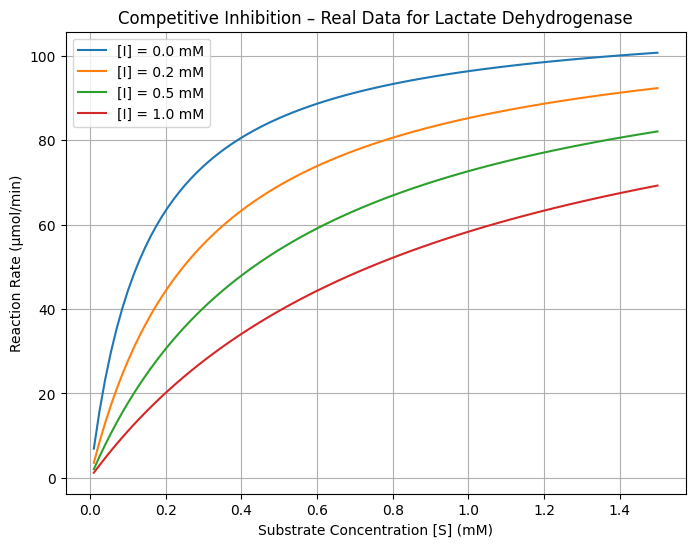

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from bioopti.simulation import simulate_reaction_rate, get_enzyme_kinetics

# Load full parameter set from JSON
enzyme = "lactate dehydrogenase"
organism = "Homo sapiens"
params = get_enzyme_kinetics(enzyme, organism)

# Extract all values from the JSON
vmax = params["vmax"]
km = params["km"]
optimal_ph = params["optimal_pH"]
optimal_temp = params["optimal_temp"]
ph_sigma = params["ph_sigma"]
temp_sigma = params["temp_sigma"]
ki = params["ki"]

# Experimental setup
ph = 7.0
temp = 37.0
substrate_concs = np.linspace(0.01, 1.5, 100)
inhibitor_levels = [0.0, 0.2, 0.5, 1.0]

# Plot reaction rate curves for different inhibitor concentrations
plt.figure(figsize=(8, 6))

for inhibitor_conc in inhibitor_levels:
    rates = [simulate_reaction_rate(
        substrate_conc=S,
        vmax=vmax,
        km=km,
        ph=ph,
        temp=temp,
        optimal_ph=optimal_ph,
        optimal_temp=optimal_temp,
        ph_sigma=ph_sigma,
        temp_sigma=temp_sigma,
        inhibitor_conc=inhibitor_conc,
        ki=ki
    ) for S in substrate_concs]

    plt.plot(substrate_concs, rates, label=f"[I] = {inhibitor_conc} mM")

plt.xlabel("Substrate Concentration [S] (mM)")
plt.ylabel("Reaction Rate (µmol/min)")
plt.title(f"Competitive Inhibition – Real Data for {enzyme.title()}")
plt.legend()
plt.grid(True)
plt.show()


## 🎛️ Section 4 – Visualizations & Interactivity

Let’s now bring BioOpti to life with interactive widgets! 🎯
These widgets are built using `ipywidgets` and update instantly based on user input.

### ⚠️⚠️⚠️COMPLTE FOR CULUTRE MDEIA OPTIMIZATION 
### ⚠️⚠️⚠️COMPLTE FOR OPTIMIZATION TOOL





### 🧪 Simulation of enzymatic reactions

Let’s interactively explore how the reaction rate changes under different conditions for **lactate dehydrogenase (Homo sapiens)**.

In this simulation, you can adjust:
- Substrate concentration `[S]`
- pH of the environment
- Temperature in °C
- Competitive inhibitor concentration `[I]`

The simulation uses kinetic parameters loaded from the local `enzyme_data.json` file:
- **Km**: Michaelis constant
- **Vmax**: Maximum reaction rate
- **Ki**: Inhibition constant

Each time you move a slider, the model recomputes the reaction rate using a modified Michaelis-Menten equation with environmental penalty functions and competitive inhibition modeling.

In [ ]:

from ipywidgets import interact, FloatSlider
from bioopti.simulation import simulate_reaction_rate, get_enzyme_kinetics
import os

# Set path to enzyme_data.json
json_path = os.path.join("..", "data", "enzyme_data.json")  

def interactive_simulation(
    substrate_conc=0.5,
    ph=7.0,
    temp=37.0,
    inhibitor_conc=0.0
):
    # Get enzyme parameters from the JSON file with explicit path
    params = get_enzyme_kinetics(
        enzyme_name="lactate dehydrogenase",
        organism="Homo sapiens",
        filepath=json_path
    )

    # Run the simulation
    rate = simulate_reaction_rate(
        substrate_conc=substrate_conc,
        vmax=params["vmax"],
        km=params["km"],
        ph=ph,
        temp=temp,
        optimal_ph=params["optimal_pH"],
        optimal_temp=params["optimal_temp"],
        ph_sigma=params["ph_sigma"],
        temp_sigma=params["temp_sigma"],
        inhibitor_conc=inhibitor_conc,
        ki=params["ki"]
    )

    # Print results
    print(f"⚡ Predicted Reaction Rate: {rate:.4f} µmol/min\n")
    print("📊 Enzyme Parameters:")
    print(f"   • Km   = {params['km']} mM")
    print(f"   • Vmax = {params['vmax']} µmol/min")
    print(f"   • Ki   = {params['ki']} mM")


# Create interactive sliders
interact(
    interactive_simulation,
    substrate_conc=FloatSlider(value=0.5, min=0.01, max=2.0, step=0.05, description="[S]"),
    ph=FloatSlider(value=7.0, min=5.5, max=9.0, step=0.1, description="[Temprature]"),
    temp=FloatSlider(value=37.0, min=20.0, max=50.0, step=0.5, description="[pH]"),
    inhibitor_conc=FloatSlider(value=0.0, min=0.0, max=1.0, step=0.05, description="[I]")
)


interactive(children=(FloatSlider(value=0.5, description='[S]', max=2.0, min=0.01, step=0.05), FloatSlider(val…

<function __main__.interactive_simulation(substrate_conc=0.5, ph=7.0, temp=37.0, inhibitor_conc=0.0)>

## 💬 Section 5 – Challenges & Limitations

### ⚠️⚠️⚠️COMPLTE FOR CULUTRE MDEIA OPTIMIZATION 
### ⚠️⚠️⚠️COMPLTE FOR OPTIMIZATION TOOL


While developing BioOpti, we encountered several technical and scientific challenges. Here's a short overview of the main limitations we faced and how we addressed (or plan to address) them:

### 🧪 Biological Modeling Challenges
- **Simplified kinetics**: We used a modified Michaelis-Menten model with Gaussian penalties for pH and temperature. While this provides useful approximations, it doesn’t capture complex regulatory mechanisms (e.g. allosteric effects, cooperativity).
- **Estimated values**: Parameters like `ph_sigma`, `temp_sigma`, and `Ki` had to be approximated, since such data is not always available. This can impact the accuracy of the simulations.
- **Single-substrate assumption**: The current model handles only single-substrate reactions. Multi-substrate and cofactor-dependent models are not yet implemented.

### 💻 Software & Implementation Challenges
- **Data format consistency**: Our enzyme dataset had to be carefully structured to avoid `KeyError`s. Adding default handling helped avoid runtime crashes.

### 👥 Teamwork & Collaboration
- We had to divide work across multiple modules (data loading, simulation, optimization). Using a clear repo structure and frequent commits helped us coordinate.
- Writing clean interfaces between modules allowed each team member to focus on their part without breaking the others’ work.

---

### 🛠️ Next Steps
To improve BioOpti in future iterations, we would like to:
- Expand the model to multi-substrate reactions
- Add support for additional inhibition types (non-competitive, uncompetitive)
- Pull real kinetic data directly from BRENDA or SABIO-RK using API queries

## ✅ Section 6 – Conclusion & Future Work

### ⚠️⚠️⚠️ TO COMPLETE 


### 🔍 What We Achieved



---

### 🙌 Final Thoughts



